>**Write a program for the knapsack problem that selects a subset of items that has maximum value and satisfies the weight constraint. All items have integer weights and values. Return the value of the subset.**

_Hint: Greedy approaches are doomed._

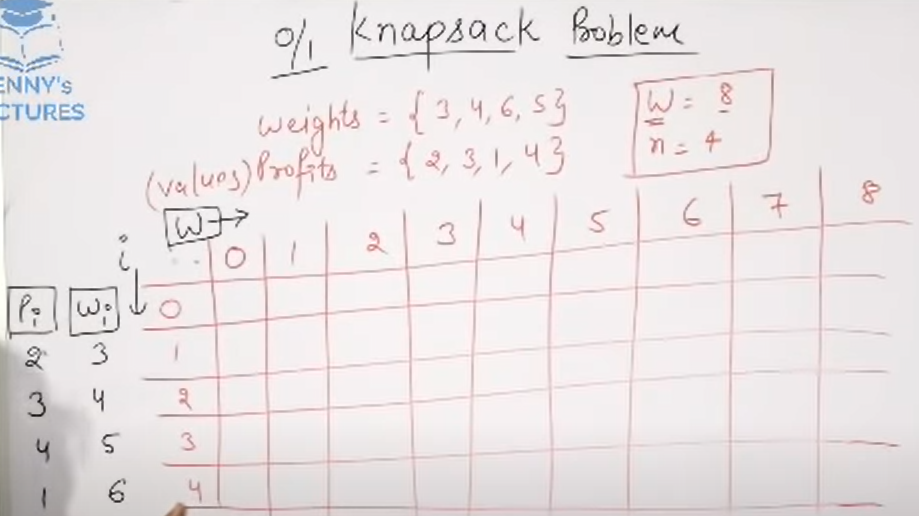  

**Helpful Videos in understanding:**  
    - [GeekForGeek Solution](https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/)
 1. [0/1 knapsack problem-Dynamic Programming | Data structures and algorithms](https://www.youtube.com/watch?v=PfkBS9qIMRE&list=PLdo5W4Nhv31aBrJE1WS4MR9LRfbmZrAQu&index=5&ab_channel=Jenny%27slecturesCS%2FITNET%26JRF)
 2. [01 Knapsack Tabulation Dynamic Programming | How to build DP table](https://www.youtube.com/watch?v=WNkqbqyvR_0&list=PLEJXowNB4kPxBwaXtRO1qFLpCzF75DYrS&index=6&ab_channel=TECHDOSE)
 3. [KNAPSACK PROBLEM USING BOTTOM UP DYNAMIC PROGRAMMING TECHNIQUE](https://www.youtube.com/watch?v=HC4kUZoIiv0&ab_channel=AdityaShastry)

In [45]:
from typing import List
from collections import namedtuple
import numpy as np

Item = namedtuple('Item', ('weight', 'value'))

# Time Complexity: O(N*W). 
def optimum_subject_to_capacity(items: List[Item], capacity: int) -> int:
    def dpHelper(capacity, wt, val, n):
        dp = [[0 for _ in range(capacity + 1)] for j in range(n + 1)]
        for i in range(n + 1):
            for j in range(capacity + 1):
                if i == 0 or j == 0:
                    dp[i][j] = 0
                elif wt[i - 1] > j:
                    dp[i][j] = dp[i - 1][j]
                else:
                    dp[i][j] = max(dp[i-1][j], val[i-1] + dp[i-1][j - wt[i-1]])
        print(np.matrix(dp))
        return dp[-1][-1]
    
    items.sort(key=lambda x: x[0])
    val = [x[1] for x in items]
    wt = [x[0] for x in items]
    n = len(items)
    return dpHelper(capacity, wt, val, n)
optimum_subject_to_capacity([(5,60),(3,50),(4,70),(2,30)], 5)

[[ 0  0  0  0  0  0]
 [ 0  0 30 30 30 30]
 [ 0  0 30 50 50 80]
 [ 0  0 30 50 70 80]
 [ 0  0 30 50 70 80]]


80

> Optimzed

_Time complexity: O(N * w)  | Space complexity: O(N)_

In [5]:
from typing import List
from collections import namedtuple

Item = namedtuple('Item', ('weight', 'value'))

def optimum_subject_to_capacity(items: List[Item], capacity: int) -> int:
    """
    items:       1,  2,  3, ... n
    item value: v1, v2, v3, ... v_n
    
    +---+---+---+
    |w0 |w1 | w2|
    +---+---+---+
    | a | b | c |
    +---+---+---+
    | d | e | f |
    +---+---+---+
    """
    n = len(items)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
    
    for row in range(1, n + 1):
        for col in range(capacity + 1):
            if row == 0 or col == 0:
                dp[row][col] == 0
            elif items[row - 1][0] > col:
                dp[row][col] = dp[row-1][col]
            else:
                dp[row][col] = max(dp[row-1][col], items[row - 1][1] + dp[row - 1][col - items[row-1][0]])
    return dp[n][capacity]


import unittest
class KnapSackTest(unittest.TestCase):
    def test_optimum_subject_to_capacity_test1(self):
        A = [[46, 83],[58, 72], [14, 50], 
             [79, 31], [87, 66], [95, 90], 
             [72, 37], [29, 89], [96, 86]
            ]
        result = optimum_subject_to_capacity(A, 49)
        self.assertEqual(result, 139)
        
    def test_optimum_subject_to_capacity_test2(self):
        A = [
            [23, 49], [34, 84], 
            [13, 15], [3, 44], 
            [87, 27], [18, 40]
            ]
        result = optimum_subject_to_capacity(A, 117)
        self.assertEqual(result, 232)

unittest.main(argv=[''], verbosity=2, exit=False)
    

test_optimum_subject_to_capacity_test1 (__main__.KnapSackTest) ... ok
test_optimum_subject_to_capacity_test2 (__main__.KnapSackTest) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


In [10]:
"""
O = [1, 10, 2, 8, 3, 6, 4, 5, 7, 0, 0, 0, 0, 0]
A = [1, 10, 0, 2, 8, 3, 0, 0, 6, 4, 0, 5, 7, 0]

A = [1, 10, 0, 2, 8, 3, 0, 0, 6, 4, 0, 5, 7, 0]
i           ^
j              ^
"""

def moveZerosToEnd(arr):
    i = 1; j = 0; n = len(arr)
    """
    A = [1, 10, 2, 0, 8, 3, 0, 0, 6, 4, 0, 5, 7, 0]
    i    ^
    j    ^
    """
    
    while i < n:
        if arr[i] == 0:
            i += 1
        else:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
            j += 1
    print(arr)

moveZerosToEnd([1, 10, 0, 2, 8, 3, 0, 0, 6, 4, 0, 5, 7, 0])


import unittest
class MoveZerosToEndTest(unittest.TestCase):
    def test_moveZerosToEnd_test1(self):
        A = [1, 10, 0, 2, 8, 3, 0, 0, 6, 4, 0, 5, 7, 0]
        moveZerosToEnd(A)
        self.assertEqual(A, [1, 10, 2, 8, 3, 6, 4, 5, 7, 0, 0, 0, 0, 0])

unittest.main(argv=[''], verbosity=2, exit=False)

test_optimum_subject_to_capacity_test1 (__main__.KnapSackTest) ... ok
test_optimum_subject_to_capacity_test2 (__main__.KnapSackTest) ... ok
test_moveZerosToEnd_test1 (__main__.MoveZerosToEndTest) ... 

[10, 2, 8, 3, 6, 4, 5, 7, 0, 1, 0, 0, 0, 0]
[10, 2, 8, 3, 6, 4, 5, 7, 0, 1, 0, 0, 0, 0]


FAIL

FAIL: test_moveZerosToEnd_test1 (__main__.MoveZerosToEndTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-10-21dcb03e706b>", line 35, in test_moveZerosToEnd_test1
    self.assertEqual(A, [1, 10, 2, 8, 3, 6, 4, 5, 7, 0, 0, 0, 0, 0])
AssertionError: Lists differ: [10, 2, 8, 3, 6, 4, 5, 7, 0, 1, 0, 0, 0, 0] != [1, 10, 2, 8, 3, 6, 4, 5, 7, 0, 0, 0, 0, 0]

First differing element 0:
10
1

- [10, 2, 8, 3, 6, 4, 5, 7, 0, 1, 0, 0, 0, 0]
?                              ---

+ [1, 10, 2, 8, 3, 6, 4, 5, 7, 0, 0, 0, 0, 0]
?  +++


----------------------------------------------------------------------
Ran 3 tests in 0.012s

FAILED (failures=1)
